<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-in-DevTown/blob/main/DAY_43_Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of the revenue for the ice-cream shop

# Impoerting Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Problem Statement
In this data, we have one independent variable 'Temperature' and one dependent variable 'Revenue'. You have to build a DecisionTreeRegressor to study the relationship b/w the two variables  of the Ice Cream Shop and then predict the revenue for the ice cream shop based on the temperature on a particular day.

# Importing dataset

Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature V/S Revenue')

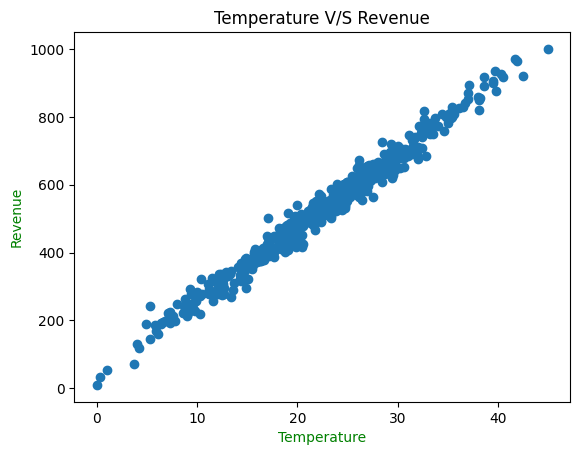

In [ ]:
#scatter plot
plt.scatter(df.Temperature,df.Revenue)
plt.xlabel('Temperature',color='g')
plt.ylabel('Revenue',color='g')
plt.title('Temperature V/S Revenue')

In [ ]:
#correlation
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


<Axes: >

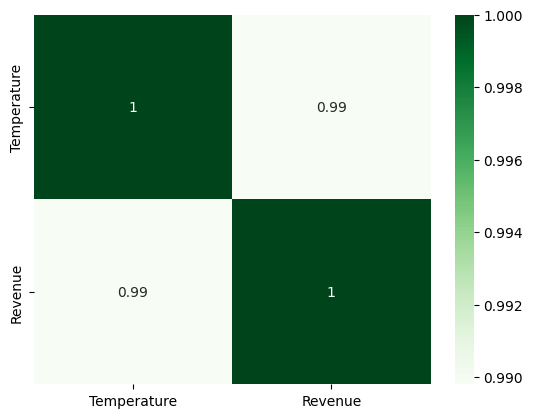

In [ ]:
#heatmap-correlation visualization
sns.heatmap(df.corr(),annot=True,cmap='Greens')

* Observation: We get strong positive correlation

<Axes: >

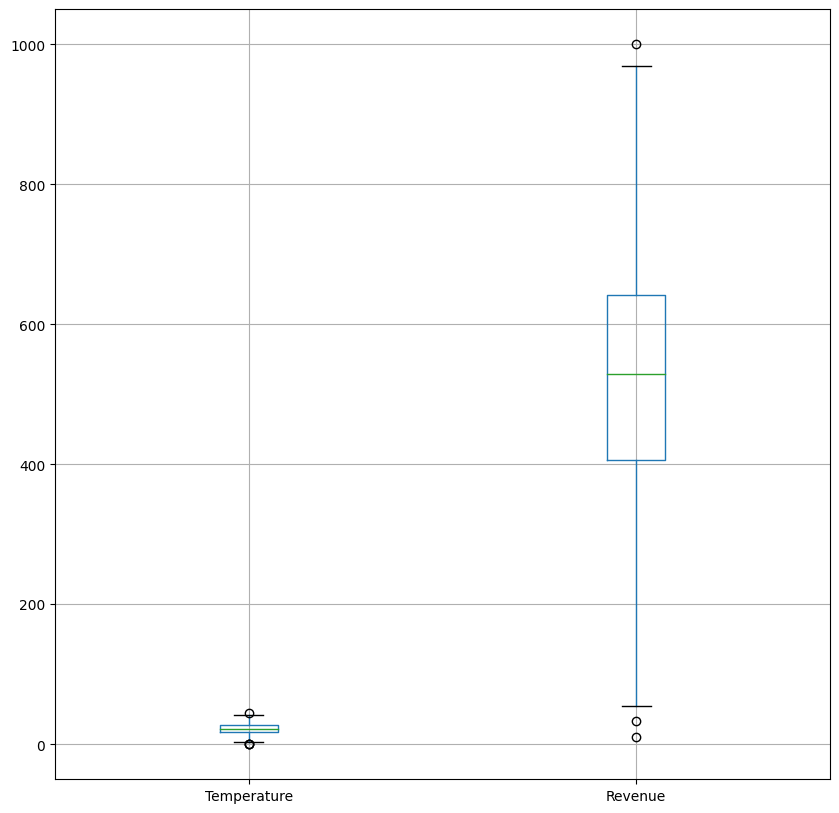

In [ ]:
# boxplot-To find out the OUTLIERS
plt.figure(figsize=(10,10))
df.boxplot()

* Observation: Here we get TWO Outliers

# Splitting of Data(Training & Testing set)

In [ ]:
X = np.array(df.Temperature.values)
y = np.array(df.Revenue.values)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_test)

100

# Choosing model

In [ ]:
regressor = DecisionTreeRegressor()

# Fitting/Training model

In [ ]:
regressor.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

DecisionTreeRegressor()

# Testing model

In [ ]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [ ]:
y_pred

array([631.3182368, 520.8534562, 571.4342569, 926.0671533, 618.4572771,
       534.7990284, 507.900282 , 572.0812915, 653.9867356, 366.2477143,
       534.6228653, 448.4713348, 661.4675188, 594.8048712, 242.2362083,
       394.1686196, 258.2868099, 421.621505 , 818.135393 , 458.860905 ,
       279.866148 , 520.4703098, 570.9909316, 539.5277397, 800.2024937,
       569.6187562, 353.3256334, 625.8046425, 618.4572771, 675.8289158,
       612.2437215, 892.9477198, 500.9250645, 546.6938576, 662.5589903,
       406.516091 , 242.5098553, 643.6486011, 242.5098553, 508.7204715,
       773.9247547, 362.5152155, 409.4028016, 588.5275513, 621.1897304,
       608.6299921, 607.8391938, 819.1175879, 195.7357217, 562.7924633,
       532.05402  , 405.6614459, 501.7329901, 396.9356482, 374.231135 ,
       536.2081816, 773.9247547, 892.9477198, 170.2377561, 421.621505 ,
       322.592741 , 396.9356482, 570.5778753, 704.2814391, 192.3419961,
       503.0842679, 583.0844489, 343.3629045, 607.8391938, 683.5

# Comparing y_test with y_pred

In [ ]:
#DataFrame of y_test/y_pred
comp = pd.DataFrame({"Actual Values":y_test.reshape(-1),
                     "Predicted Values":y_pred.reshape(-1)})

In [ ]:
comp

,Actual Values,Predicted Values
0,651.186242,631.318237
1,550.441272,520.853456
2,583.855231,571.434257
3,918.391232,926.067153
4,654.894955,618.457277
...,...,...
95,603.324631,604.626673
96,383.956240,374.231135
97,618.235765,682.752869
98,644.488633,654.197406


Text(0, 0.5, 'y_test/y_pred')

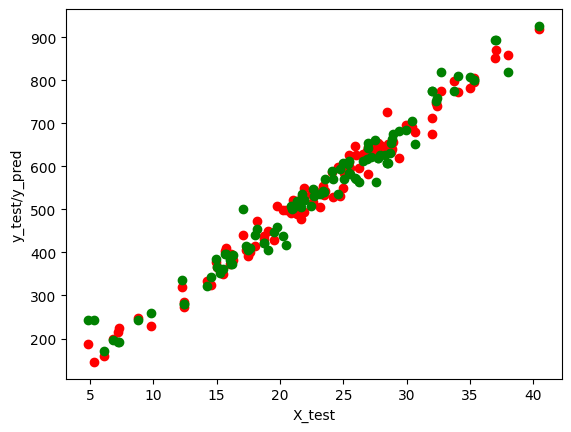

In [ ]:
#scatter plot of comparison
plt.scatter(X_test,y_test,color='r')
plt.scatter(X_test,y_pred,color='g')
plt.xlabel('X_test')
plt.ylabel('y_test/y_pred')

<Axes: >

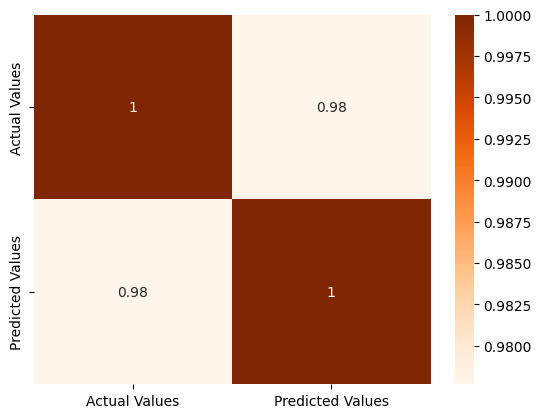

In [ ]:
#heatmap of comparison
sns.heatmap(comp.corr(),annot=True,cmap='Oranges')

<Axes: >

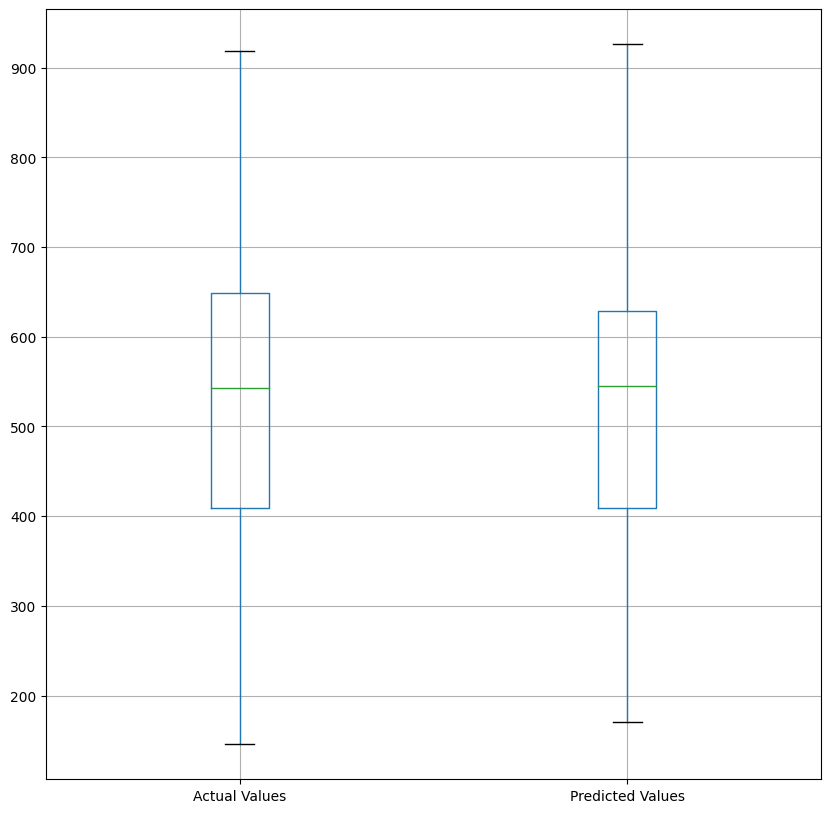

In [ ]:
#boxplot
plt.figure(figsize=(10,10))
comp.boxplot()

# Performance

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
r2_score(y_test,y_pred)

0.9554488950510548

In [ ]:
mean_squared_error(y_test,y_pred)

1290.378722690458

In [ ]:
mean_absolute_error(y_test,y_pred)

27.275472868999994